## 멜론 시대별 차트로 보는 장르별 선호 흐름

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
names = ['Date', '애시드/퓨전/팝', '드라마OST', '클래식', '인디음악', '영화OST', '발라드', '댄스', '록/메탈',
         'R&B/Soul', '일렉트로니카', '랩/힙합', 'EDM', 'POP', 'J-POP', '성인가요', '재즈', '뉴에이지',
         '포크/블루스', '만화/게임OST', '-']

In [3]:
def get_data_frame():
    # print("current : ", year, month)
    load_file = "C:/Users/jay/Jay/기말플젝/final_data/final.csv"

    try:
        data = pd.read_csv(load_file, encoding='cp949',
                           names=names, header=None)
    except UnicodeError:
        try:
            data = pd.read_csv(load_file, encoding='utf-8',
                               names=names, header=None)
        except Exception as e:
            print(e)
    return data

In [4]:
def get_element_analysis(data_frame, ele):
    res = []
    for i in range(0, len(data_frame)-1):
       res.append([data_frame.get('Date')[i]] + [data_frame.get(ele[0])[i]])
    df = pd.DataFrame(res, columns=['Date', 'freq'])
    data = np.array(res)
    print(data)

In [5]:
def get_keys(data):
    keys = []
    for key in data.keys():
        if key != 'Date':
            keys.append([key])
    return keys

In [6]:
data = get_data_frame()
mellon_df = pd.DataFrame(data, columns=names)

In [27]:
mellon_df  = mellon_df.dropna(axis = 0)

In [28]:
mellon_df

,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0.0,2000-01,0.0,0.000000,0.0,0.000000,0.000000,34.615385,28.205128,19.230769,3.846154,...,10.256410,0.0,0.000000,0.0,0.000000,0.0,1.282051,1.282051,0.000000,1.282051
1.0,2000-02,0.0,0.000000,0.0,1.515152,0.000000,34.848485,33.333333,18.181818,3.030303,...,7.575758,0.0,0.000000,0.0,0.000000,0.0,1.515152,0.000000,0.000000,0.000000
2.0,2000-03,0.0,1.470588,0.0,1.470588,0.000000,41.176471,26.470588,17.647059,2.941176,...,7.352941,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.470588
3.0,2000-04,0.0,1.408451,0.0,1.408451,0.000000,39.436620,30.985915,15.492958,4.225352,...,7.042254,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4.0,2000-05,0.0,1.333333,0.0,0.000000,0.000000,40.000000,29.333333,12.000000,6.666667,...,10.666667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234.0,2019-07,0.0,4.166667,0.0,8.333333,3.333333,29.166667,15.833333,5.833333,8.333333,...,10.833333,0.0,10.833333,0.0,0.833333,0.0,0.000000,1.666667,0.000000,0.000000
235.0,2019-08,0.0,11.023622,0.0,7.874016,1.574803,29.133858,14.960630,3.937008,7.874016,...,11.811024,0.0,7.874016,0.0,0.787402,0.0,0.000000,2.362205,0.000000,0.000000
236.0,2019-09,0.0,10.606061,0.0,11.363636,1.515152,33.333333,11.363636,7.575758,6.818182,...,9.090909,0.0,6.818182,0.0,0.000000,0.0,0.000000,0.757576,0.000000,0.000000
237.0,2019-10,0.0,8.064516,0.0,9.677419,0.806452,37.096774,8.870968,8.870968,8.064516,...,9.677419,0.0,5.645161,0.0,0.000000,0.0,0.000000,2.419355,0.000000,0.000000


In [29]:
print(mellon_df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 239 entries, 0.0 to 238.0
Data columns (total 21 columns):
Date        239 non-null object
애시드/퓨전/팝    239 non-null float64
드라마OST      239 non-null float64
클래식         239 non-null float64
인디음악        239 non-null float64
영화OST       239 non-null float64
발라드         239 non-null float64
댄스          239 non-null float64
록/메탈        239 non-null float64
R&B/Soul    239 non-null float64
일렉트로니카      239 non-null float64
랩/힙합        239 non-null float64
EDM         239 non-null float64
POP         239 non-null float64
J-POP       239 non-null float64
성인가요        239 non-null float64
재즈          239 non-null float64
뉴에이지        239 non-null float64
포크/블루스      239 non-null float64
만화/게임OST    239 non-null float64
-           239 non-null float64
dtypes: float64(20), object(1)
memory usage: 41.1+ KB
None


In [62]:
mellon_df['Date'] = pd.to_datetime(mellon_df['Date'], dayfirst=True, errors='coerce')
mellon_df['Date'] = mellon_df['Date']

In [63]:
mellon_df  = mellon_df.dropna(axis = 0)

In [64]:
for key in mellon_df.keys():
    if key != 'Date' :
        mellon_df[key] = pd.to_numeric(mellon_df[key], errors='coerce')
print(mellon_df.dtypes)

Date        datetime64[ns]
애시드/퓨전/팝           float64
드라마OST             float64
클래식                float64
인디음악               float64
영화OST              float64
발라드                float64
댄스                 float64
록/메탈               float64
R&B/Soul           float64
일렉트로니카             float64
랩/힙합               float64
EDM                float64
POP                float64
J-POP              float64
성인가요               float64
재즈                 float64
뉴에이지               float64
포크/블루스             float64
만화/게임OST           float64
-                  float64
dtype: object


In [65]:
r = mellon_df.rolling(window=30)
r.mean()

,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,일렉트로니카,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234.0,0.0,5.082173,0.0,6.948721,0.361165,28.887690,19.175920,3.137059,9.304173,1.353853,16.875229,0.566859,4.153004,0.0,0.084291,0.0,7.401487e-18,4.042084,0.027778,4.440892e-17
235.0,0.0,5.046401,0.0,6.996135,0.386776,28.998604,19.298263,3.214530,9.109651,1.380100,16.650650,0.566859,4.334826,0.0,0.110538,0.0,7.401487e-18,3.878889,0.027778,4.440892e-17
236.0,0.0,5.077356,0.0,7.106105,0.437281,29.088210,19.193180,3.386410,9.014343,1.378471,16.469809,0.539977,4.481454,0.0,0.110538,0.0,7.401487e-18,3.689088,0.027778,4.440892e-17
237.0,0.0,5.100272,0.0,7.155462,0.464163,29.341162,18.942431,3.600141,8.873324,1.378030,16.382554,0.512655,4.587659,0.0,0.110538,0.0,7.401487e-18,3.523831,0.027778,4.440892e-17


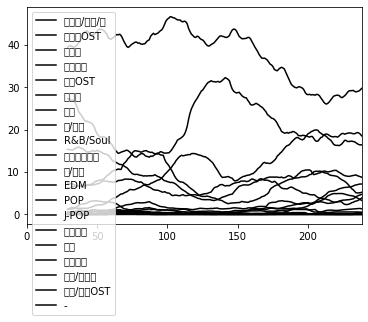

In [66]:
## 이동평균( 추세선 )
r.mean().plot(style='k')

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

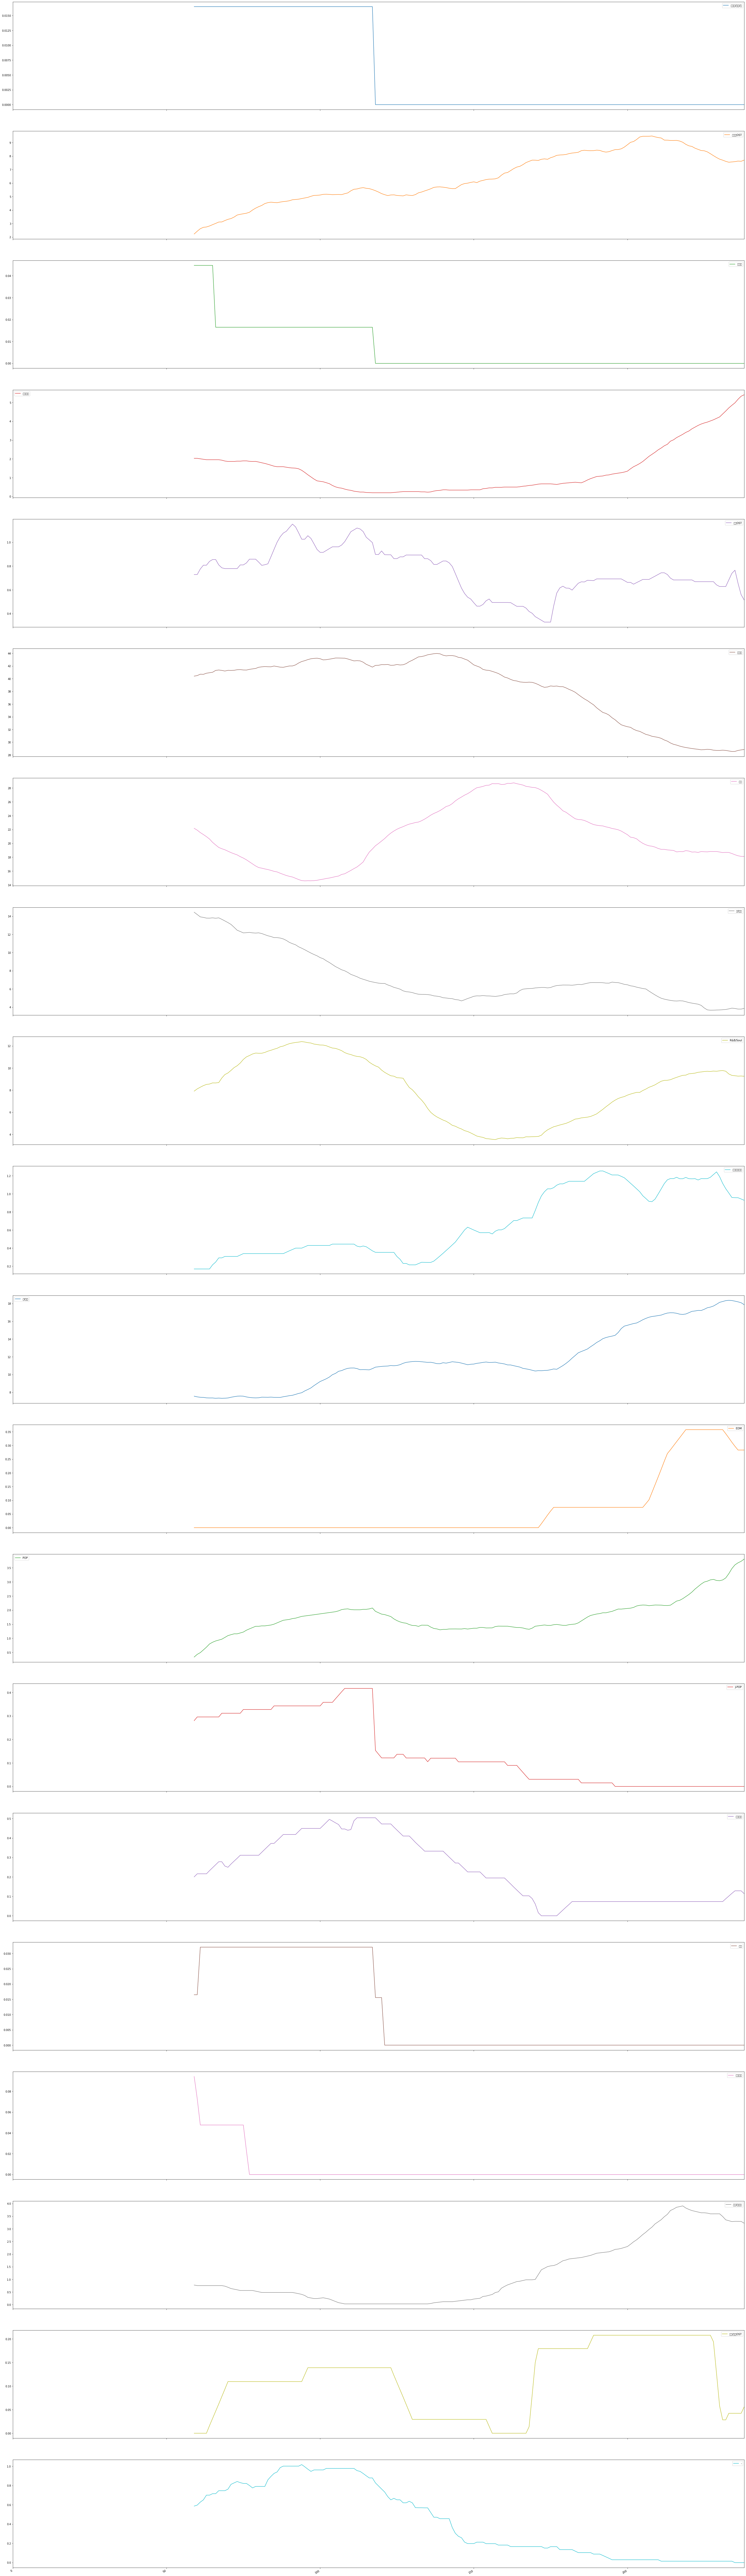

In [77]:
#temp = mellon_df.cumsum()
plt.rcParams["figure.figsize"] = (50,200)
pp = mellon_df.rolling(window=60).mean().plot(subplots=True)
plt.plot(pp)
plt.show()

In [ ]:

mellon_df.rolling(window=60).mean().plot(subplots=True)